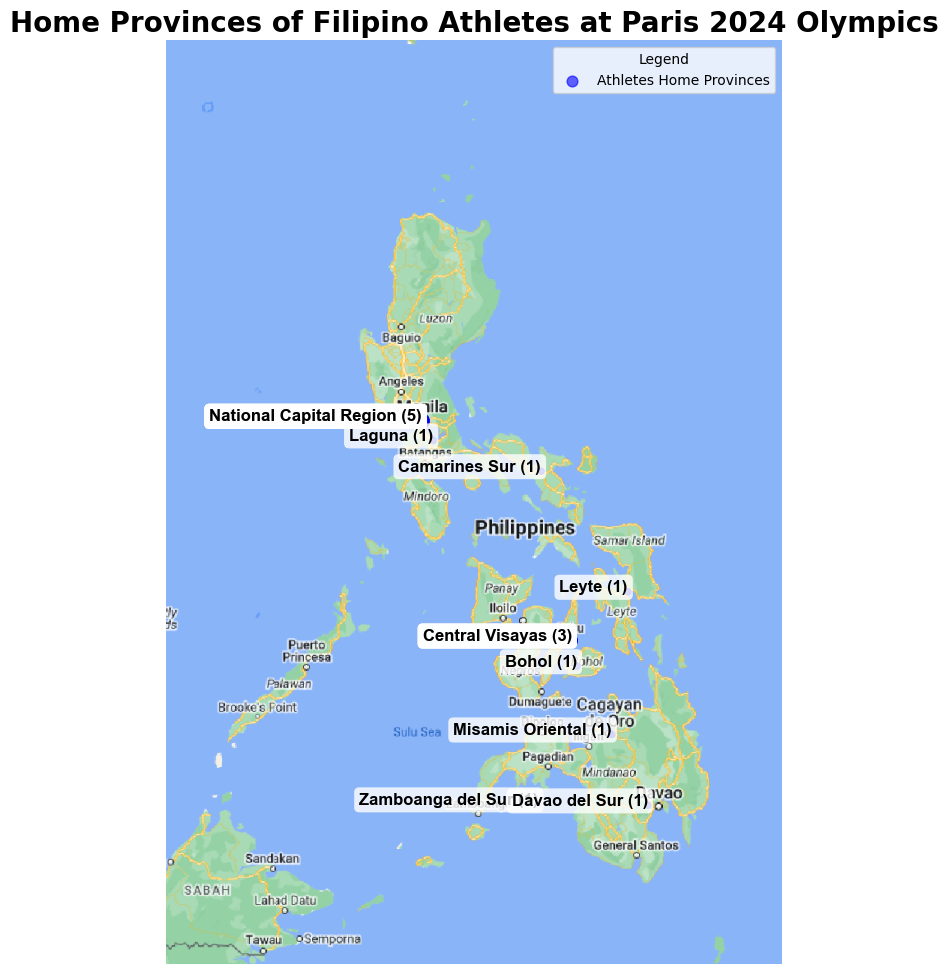

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

# Load the shapefile of the Philippines
shapefile_path = "C:/Users/tmilagroso/Downloads/pythonProj/gadm41_PHL_shp/gadm41_PHL_1.shp"
gdf = gpd.read_file(shapefile_path)

# Athlete dataset
athletes_data = [
    {"Name": "EJ Obiena", "Hometown": "National Capital Region"},  
    {"Name": "Carlo Paalam", "Hometown": "Misamis Oriental"},
    {"Name": "Eumir Marcial", "Hometown": "Zamboanga del Sur"},
    {"Name": "Aira Villegas", "Hometown": "Leyte"},
    {"Name": "Nesthy Petecio", "Hometown": "Davao del Sur"},
    {"Name": "Hergie Bacyadan", "Hometown": "National Capital Region"},
    {"Name": "Samantha Catantan", "Hometown": "National Capital Region"},
    {"Name": "Bianca Pagdanganan", "Hometown": "National Capital Region"},
    {"Name": "Dottie Ardina", "Hometown": "Laguna"},
    {"Name": "Carlos Yulo", "Hometown": "National Capital Region"},
    {"Name": "Kiyomi Watanabe", "Hometown": "Central Visayas"},  
    {"Name": "Joanie Delgaco", "Hometown": "Camarines Sur"},
    {"Name": "John Ceniza", "Hometown": "Central Visayas"},  
    {"Name": "Elreen Ando", "Hometown": "Central Visayas"},  
    {"Name": "Vanessa Sarno", "Hometown": "Bohol"},
]

# Convert the athlete data to a DataFrame
athletes_df = pd.DataFrame(athletes_data)

# Define coordinates for provinces
def get_coordinates(hometown):
    hometown_coords = {
        "Misamis Oriental": (124.68, 8.47),
        "Zamboanga del Sur": (123.25, 7.11),
        "Leyte": (124.99, 11.25),
        "Davao del Sur": (125.38, 7.09),
        "Laguna": (121.2, 14.2),
        "Camarines Sur": (123.3, 13.6),
        "Bohol": (124.0, 9.8),
        "National Capital Region": (120.98, 14.58),  # Approximate for NCR
        "Central Visayas": (123.9, 10.3),  # Generalized coordinates
    }
    return hometown_coords.get(hometown.split(",")[0], (None, None))

# Add latitude and longitude columns to the DataFrame
athletes_df[['Longitude', 'Latitude']] = athletes_df['Hometown'].apply(lambda x: pd.Series(get_coordinates(x)))

# Group by hometown and count athletes
hometown_counts = athletes_df['Hometown'].value_counts().reset_index()
hometown_counts.columns = ['Hometown', 'Count']

# Merge counts back into the original dataframe
athletes_df = athletes_df.merge(hometown_counts, on='Hometown')

# Create a GeoDataFrame from the athletes data
athletes_gdf = gpd.GeoDataFrame(athletes_df, geometry=gpd.points_from_xy(athletes_df.Longitude, athletes_df.Latitude))

# Set up the plot with Cartopy
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([116, 128, 4, 22])

# Add Geoportal PH basemap (using the correct method)
basemap = cimgt.GoogleTiles()  # You can try different tile sources here
ax.add_image(basemap, 6)  # Adjust zoom level (8 is an example)

# Overlay the athlete locations with varying sizes
athletes_gdf.plot(ax=ax, color='blue', markersize=athletes_df['Count'] * 20, alpha=0.6, label='Athletes Home Provinces', zorder=3)

# Add labels for each athlete's hometown with count
for x, y, label, count in zip(athletes_gdf.geometry.x, athletes_gdf.geometry.y, athletes_gdf['Hometown'], athletes_gdf['Count']):
    ax.text(x, y, f"{label} ({count})", fontsize=12, ha='right', color='black', fontweight='bold', fontname='Arial',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'), zorder=4)

# Add title and legend
ax.set_title("Home Provinces of Filipino Athletes at Paris 2024 Olympics", fontsize=20, fontweight='bold', loc='center')
plt.legend(title="Legend", fontsize=10, loc='upper right')

plt.axis('off')  # Turn off the axis for better visualization
plt.savefig('athletes_homeprovinces_map.png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()